<a href="https://colab.research.google.com/github/microprediction/timeseries-notebooks/blob/main/tdigest_composition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install tdigest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import sys
sys.version

'3.7.14 (default, Sep  8 2022, 00:06:44) \n[GCC 7.5.0]'

In [80]:
USE_HACK = True

from tdigest import TDigest
import numpy as np 
data = [1,2,3,4,5,6]*5000
if USE_HACK:
  data = [ d+np.random.randn()*0.00000001 for d in data]
t = TDigest()
t.batch_update(data)
t.percentile(1/6)
t.cdf(1.2)

0.16549666661044118

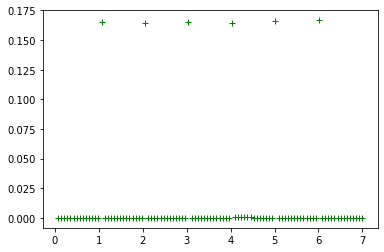

In [88]:
import numpy as np 

def perc_plot(t):
  xs = np.linspace(0.5,99.5,100)
  print(xs)
  ys = [ t.percentile(x) for x in xs ]
  print(ys)
  import matplotlib.pyplot as plt
  plt.plot(xs,ys,'g+')

def cdf_plot(t):
  xs = np.linspace(0,7,100)
  ys = [ t.cdf(x) for x in xs ]
  print(list(zip(xs,ys)))
  import matplotlib.pyplot as plt
  plt.plot(xs,ys,'g+')

def pdf_plot(t, lb=0,ub=7):
  xs = np.linspace(lb,ub,100)
  ys = [ t.cdf(x) for x in xs ]
  dys = np.diff(ys)
  import matplotlib.pyplot as plt
  plt.plot(xs[1:],dys,'g+')

pdf_plot(t)

In [51]:
import scipy
from scipy.stats import norm


def transform(t, x, tol=1e-16):
    p = t.cdf(x)
    if p<tol:
       p = tol
    if p>1-tol:
       p = 1-tol
    y = norm.ppf(p)
    if np.isnan(y):
      print({'x':x,'p':p,'y':y})
    return y



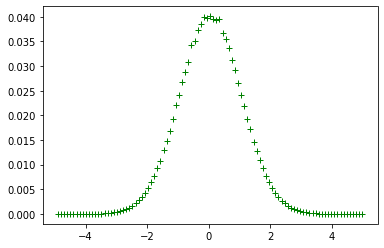

In [89]:
from tdigest import TDigest
import numpy as np 
s = TDigest()
xs = np.linspace(1/50000,1-1/50000,50000)
s.batch_update( [ norm.ppf(x) for x in xs ] )

def stransform(x):
   return transform(s,x)

pdf_plot(s,lb=-5,ub=5)

[(-1.9839679358717444, 0.0004397826123256898), (-1.9438877755511026, -9.914095883978291e-05), (-1.9038076152304608, 0.00018662647091716167), (-1.8637274549098208, 0.0001587291182132411), (-1.823647294589179, -0.00035892936344006365), (-1.7835671342685373, 0.0002899212083962155), (-1.7434869739478955, 0.0002660825426454849), (-1.7034068136272555, 0.0008352250156651309), (-1.6633266533066138, -0.0006663455871172008), (-1.623246492985972, 0.0008208287770521405), (-1.5831663326653302, 0.0007282215413777493), (-1.5430861723446903, 6.189709581549963e-05), (-1.5030060120240485, 5.311792355078282e-05), (-1.4629258517034067, -1.9561444414728513e-05), (-1.4228456913827667, -0.00010681584101068786), (-1.382765531062125, 0.0010448106279001834), (-1.3426853707414832, 0.00021662195639016169), (-1.3026052104208414, 0.0014279682973810104), (-1.2625250501002014, 0.0005736510206777456), (-1.2224448897795597, 0.0004913262483317027), (-1.182364729458918, 6.352387510988322e-05), (-1.1422845691382761, 4.167

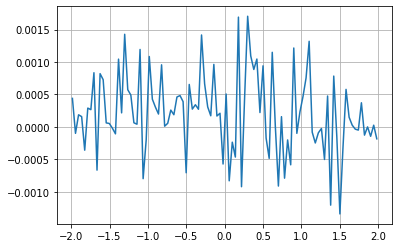

In [91]:
def plot_transform_error(f):
  xs = np.linspace(-10,10,500)
  ys = [ f(x) for x in xs]
  ds = [ x-y for x,y in zip(xs,ys)]

  print(list(zip(xs[200:-200],ds[200:-200])))
 
  import matplotlib.pyplot as plt
  plt.plot(xs[200:-200],ds[200:-200])
  plt.grid()

plot_transform_error(stransform)

In [72]:
import sys
import json 
sys.getsizeof(s.to_dict())
sys.getsizeof(json.dumps(s.to_dict()))

25977

In [77]:
x = np.random.randn(700)
sys.getsizeof(json.dumps(list(x)))

14491

# Timing some things 

In [139]:
import time 
from tdigest.tdigest import Centroid
st = time.time()
tjson = json.dumps(t.to_dict())


def from_dict(d:dict):
   t = TDigest()
   for droid in tj['centroids']:
       ci = Centroid(droid['m'],droid['c'])
       q.C.insert(droid['m'], ci)
   q.K = d['K']
   q.delta = d['delta']
   q.n = d['n']
   return q 

tjson = json.dumps(t.to_dict())
for _ in range(100):
    tj = json.loads(tjson)
    q = from_dict(tj)
   
    #g = json.loads(tjson)
    if False:
      q = TDigest()
      q.update_from_dict(g)
print(time.time()-st)
q

0.3288402557373047


<T-Digest: n=30000, centroids=712>

In [117]:
for _ in range(100):
    q = TDigest()
    g = json.loads(tjson)
    q.update_from_dict(g)
print(time.time()-st)

58.68782925605774
